# 

In [1]:
from Scripts.Make_logistic import *
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
import numpy as np

In [2]:
df

NameError: name 'df' is not defined

In [ ]:
df = pd.read_excel('Data/Clinical_synthetic.xlsx', index_col=0)
X,y=df.loc[:,['acetald_season_m18', 'acetone_season_m18', 'form_season_m18',
       'pm25_season_m18', 'nox_season_m18', 'bc_season_m18', 'no2_season_m18', 'genetic_risk_score_asthma', 'gestational_age',
       'no2_str_m18', 'nox_str_m18', 'pm25_str_m18', 'nox_urb_m18',"lrti_1y"]],df.asthma_0_7yrs

In [ ]:
performence,kernel,mcmc=nested_cross_baysian_logistic(X,y,2,3,"Models/asthma_7_year_")

In [ ]:
performence.roc_test.mean()

Warmup:   0%|▏                                       | 132/30000 [00:19, 44.91it/s, step size=4.87e-01, acc. prob=0.779]

In [ ]:
performence.to_excel("Models/performence_7.xlsx")

In [ ]:
asthma_1_exposure=az.from_json("Models/asthma_7_year_00.json")
asthma_2_exposure=az.from_json("Models/asthma_7_year_01.json")
asthma_3_exposure=az.from_json("Models/asthma_7_year_10.json")
asthma_4_exposure=az.from_json("Models/asthma_7_year_11.json")
asthma_5_exposure=az.from_json("Models/asthma_7_year_20.json")
asthma_6_exposure=az.from_json("Models/asthma_7_year_21.json")
asthma=az.concat(asthma_1_exposure,asthma_2_exposure,asthma_3_exposure,asthma_4_exposure,asthma_5_exposure,asthma_6_exposure, dim="chain")

In [ ]:
asthma["posterior"]["weight"]=np.exp(asthma["posterior"]["weight"])
asthma.posterior = asthma.posterior.assign_coords(
    weight_dim_0=X.columns
)
asthma.to_netcdf("Models/asthma_7y.nc")

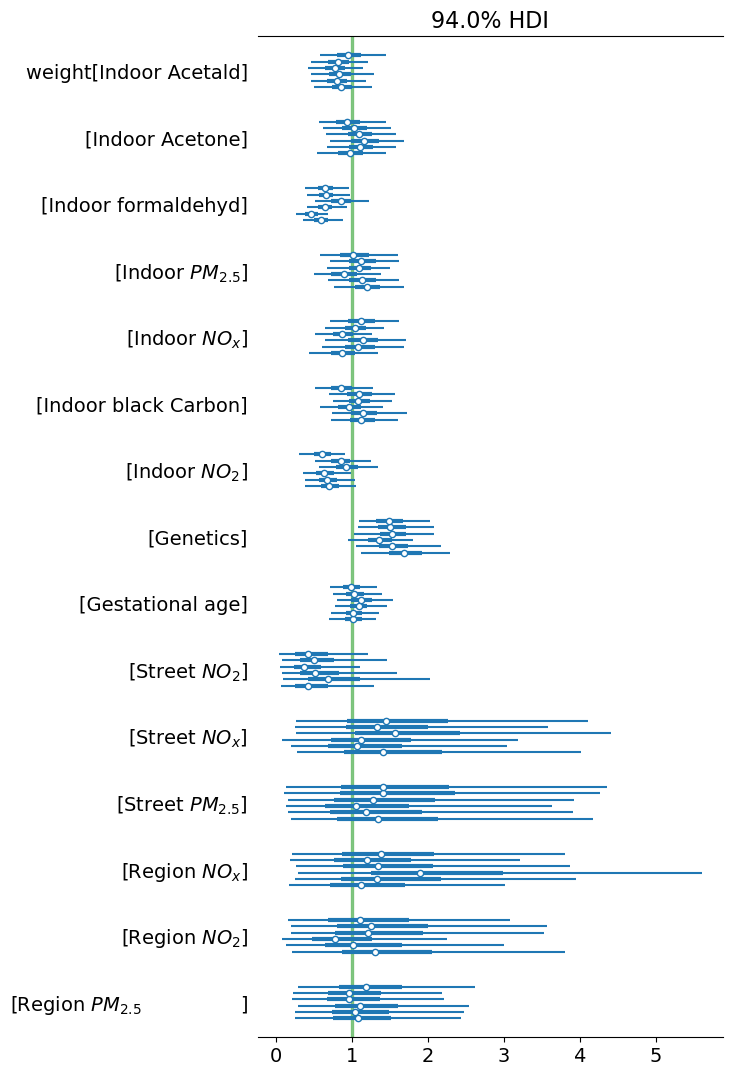

In [4]:
ax = az.plot_forest(
    [asthma], var_names="weight",rope=[0.99,1.01])

In [13]:
az.rcParams["plot.max_subplots"] = 200


In [14]:
az.plot_pair(
    asthma, var_names=["weight"],divergences=True,marginals=True);